In [619]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string
import re
import os

In [620]:
train_data = pd.read_csv(os.path.join(os.getcwd(), 'train_data.csv'),names=["sentiments", "reviews"])

In [621]:
def basic_cleaning(data_frame):
    data_frame['reviews'] = data_frame.reviews.apply(lambda review: review.lower())
    data_frame['reviews'] = data_frame.reviews.apply(lambda review: review.translate(str.maketrans('', '', string.punctuation)))
    data_frame['reviews'] = data_frame.reviews.apply(lambda review: review.translate(str.maketrans('', '', string.digits)))
    data_frame['reviews'] = data_frame.reviews.apply(lambda review: re.sub("r[^a-z]",'',review))

    
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

def tokenize_data(data_frame):
    data_frame['words'] = data_frame.reviews.apply(lambda review: nltk.word_tokenize(review))

from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

def remove_stopwords(list):
    stop_words_removed = []
    for i in list:
        if i not in stopwords:
            stop_words_removed.append(i)
    return stop_words_removed

In [622]:
# nltk.download('all')
#tag part of speech to get more accurate word during lemmatizaton
def tag_pos(list_of_words):
    return nltk.pos_tag(list_of_words)

#extraction of lemma words after pos taggin 
from nltk.stem import WordNetLemmatizer
lemmatizer= WordNetLemmatizer()

def find_lemma_word(word):
    lemma_words=[]
    words_with_pos = tag_pos(word)
    for word in words_with_pos:
        if word[1].startswith('NN'):
            lemma_words.append(lemmatizer.lemmatize(word[0],pos='n'))
        elif word[1].startswith('VB'):
            lemma_words.append(lemmatizer.lemmatize(word[0],pos='v'))
        elif word[1].startswith('JJ'):
            lemma_words.append(lemmatizer.lemmatize(word[0],pos='a'))
        elif word[1].startswith('RB'):
            lemma_words.append(lemmatizer.lemmatize(word[0],pos='r'))
        else:
            lemma_words.append(word[0])
            
    return lemma_words

In [623]:
basic_cleaning(train_data)
tokenize_data(train_data)
train_data['stop_words_cleaned'] = train_data.words.apply(lambda word_list: remove_stopwords(word_list))
train_data['lemma_word'] = train_data.stop_words_cleaned.apply(lambda word_list: find_lemma_word(word_list))
train_data['cleaned_review'] = train_data.lemma_word.apply(lambda review_list: " ".join(review_list))

In [624]:
train_data

,sentiments,reviews,words,stop_words_cleaned,lemma_word,cleaned_review
0,-1,eat at fioris they said youll like it they sa...,"[eat, at, fioris, they, said, youll, like, it,...","[eat, fioris, said, youll, like, saidnnis, con...","[eat, fioris, say, youll, like, saidnnis, conv...",eat fioris say youll like saidnnis convenientl...
1,-1,i just dont understand the appeal ive tried t...,"[i, just, dont, understand, the, appeal, ive, ...","[dont, understand, appeal, ive, tried, place, ...","[dont, understand, appeal, ive, tried, place, ...",dont understand appeal ive tried place twice t...
2,1,this is my go to place foa really good beef en...,"[this, is, my, go, to, place, foa, really, goo...","[go, place, foa, really, good, beef, enchilada...","[go, place, foa, really, good, beef, enchilada...",go place foa really good beef enchilada red sa...
3,-1,not impressed when i ordered the oyako bowl th...,"[not, impressed, when, i, ordered, the, oyako,...","[impressed, ordered, oyako, bowl, conversation...","[impressed, order, oyako, bowl, conversation, ...",impressed order oyako bowl conversation go som...
4,-1,this is the first time evei wrote a bad review...,"[this, is, the, first, time, evei, wrote, a, b...","[first, time, evei, wrote, bad, review, frustr...","[first, time, evei, write, bad, review, frustr...",first time evei write bad review frustrate her...
...,...,...,...,...,...,...
17995,-1,i was referred to go to this place by a buddy ...,"[i, was, referred, to, go, to, this, place, by...","[referred, go, place, buddy, aftea, conversati...","[refer, go, place, buddy, aftea, conversation,...",refer go place buddy aftea conversation get sh...
17996,1,the food here was really good we started off ...,"[the, food, here, was, really, good, we, start...","[food, really, good, started, garlic, bread, c...","[food, really, good, start, garlic, bread, cov...",food really good start garlic bread cover toma...
17997,1,i eat at this place maybe a week i am die har...,"[i, eat, at, this, place, maybe, a, week, i, a...","[eat, place, maybe, week, die, hard, wing, fan...","[eat, place, maybe, week, die, hard, wing, fan...",eat place maybe week die hard wing fan best ev...
17998,1,phoenix airport is getting betteday by day i ...,"[phoenix, airport, is, getting, betteday, by, ...","[phoenix, airport, getting, betteday, day, pri...","[phoenix, airport, get, betteday, day, primari...",phoenix airport get betteday day primarily use...


In [888]:
from sklearn.model_selection import train_test_split
train_review, test_review, train_sentiment, test_sentiment =train_test_split(train_data.cleaned_review,train_data.sentiments,shuffle=True,random_state=0,stratify=train_data.sentiments,train_size=.87)

In [889]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vectorizer = TfidfVectorizer(min_df=.011,use_idf=False,ngram_range=(1,2))
feature_matrix = tf_vectorizer.fit_transform(train_review)
feature_array = feature_matrix.toarray()

In [890]:
vocab_list = tf_vectorizer.get_feature_names_out()
vocab_list

array(['able', 'absolutely', 'across', 'act', 'actually', 'add', 'aftea',
       'aftei', 'afternoon', 'aftethe', 'ago', 'agree', 'airport',
       'allow', 'almost', 'along', 'already', 'also', 'although',
       'always', 'amaze', 'amazing', 'ambiance', 'amount', 'anyone',
       'anything', 'anyway', 'anywhere', 'apparently', 'appointment',
       'appreciate', 'area', 'arent', 'arizona', 'around', 'arrive',
       'ask', 'ate', 'atmosphere', 'attention', 'attentive', 'attitude',
       'authentic', 'available', 'average', 'avoid', 'away', 'awesome',
       'awful', 'az', 'back', 'bacon', 'bad', 'bag', 'barely', 'base',
       'basic', 'basically', 'bathroom', 'bbq', 'bean', 'beat',
       'beautiful', 'become', 'bed', 'beef', 'beer', 'begin', 'behind',
       'believe', 'best', 'bettethan', 'big', 'bill', 'birthday', 'bit',
       'bite', 'black', 'bland', 'book', 'bottle', 'bowl', 'box',
       'boyfriend', 'bread', 'break', 'breakfast', 'bring', 'brown',
       'buck', 'buffet', 

### Select K-best features

In [917]:
from sklearn.feature_selection import SelectKBest, chi2

vocab_list = tf_vectorizer.get_feature_names_out()

select_k_best = SelectKBest(score_func=chi2, k= int(len(vocab_list)*.12))
train_sentiment_np_array = np.array(train_sentiment)
select_k_best.fit(feature_array, train_sentiment_np_array)
mask = select_k_best.get_support()
k_best_feature = vocab_list[mask]
k_best_feature

array(['always', 'amaze', 'amazing', 'ask', 'avoid', 'awesome', 'awful',
       'az', 'bad', 'beautiful', 'best', 'bland', 'call', 'charge',
       'charlotte', 'cold', 'could', 'definitely', 'delicious', 'didnt',
       'dirty', 'disappointed', 'disgust', 'dont', 'dry', 'easy', 'enjoy',
       'excellent', 'family', 'fantastic', 'favorite', 'food great',
       'fresh', 'friendly', 'fun', 'give', 'good', 'great', 'great food',
       'great place', 'great service', 'gross', 'guess', 'happy',
       'helpful', 'highly', 'highly recommend', 'horrible', 'hotel',
       'lack', 'leave', 'little', 'love', 'love place', 'maybe',
       'mediocre', 'mexican', 'minute', 'money', 'nothing', 'ok', 'okay',
       'one best', 'order', 'overprice', 'pay', 'perfect', 'phoenix',
       'pittsburgh', 'recommend', 'rude', 'say', 'seem', 'selection',
       'slow', 'someone', 'sorry', 'spot', 'staff', 'table', 'taste',
       'taste like', 'tell', 'terrible', 'think', 'two', 'unfortunately',
       'us

In [949]:
k_best_feature.shape

(98,)

### Supervised Chi-Square weight for k-best term by utilising target value

In [950]:
from sklearn.feature_extraction.text import TfidfVectorizer
selected_tf_vectorizer = TfidfVectorizer(use_idf=True, vocabulary=k_best_feature, sublinear_tf=True, ngram_range=(1,2))
selected_feat_array = selected_tf_vectorizer.fit_transform(train_review).toarray()
selected_test_array = selected_tf_vectorizer.transform(test_review).toarray()
observed_value_table = pd.DataFrame(selected_tf_vectorizer.get_feature_names_out(), columns=['features'])

In [951]:
selected_tf_vectorizer.get_feature_names_out()

array(['always', 'amaze', 'amazing', 'ask', 'avoid', 'awesome', 'awful',
       'az', 'bad', 'beautiful', 'best', 'bland', 'call', 'charge',
       'charlotte', 'cold', 'could', 'definitely', 'delicious', 'didnt',
       'dirty', 'disappointed', 'disgust', 'dont', 'dry', 'easy', 'enjoy',
       'excellent', 'family', 'fantastic', 'favorite', 'food great',
       'fresh', 'friendly', 'fun', 'give', 'good', 'great', 'great food',
       'great place', 'great service', 'gross', 'guess', 'happy',
       'helpful', 'highly', 'highly recommend', 'horrible', 'hotel',
       'lack', 'leave', 'little', 'love', 'love place', 'maybe',
       'mediocre', 'mexican', 'minute', 'money', 'nothing', 'ok', 'okay',
       'one best', 'order', 'overprice', 'pay', 'perfect', 'phoenix',
       'pittsburgh', 'recommend', 'rude', 'say', 'seem', 'selection',
       'slow', 'someone', 'sorry', 'spot', 'staff', 'table', 'taste',
       'taste like', 'tell', 'terrible', 'think', 'two', 'unfortunately',
       'us

In [952]:
tf_data_frame = pd.DataFrame(selected_feat_array,columns = selected_tf_vectorizer.get_feature_names_out())
tf_data_frame['sentiments'] = np.array(train_sentiment)

In [953]:
observed_value_table['positive_sentiment'] = observed_value_table.features.apply(lambda feature: tf_data_frame.loc[tf_data_frame['sentiments']==1,feature].sum())

In [954]:
observed_value_table['negative_sentiment'] = observed_value_table.features.apply(lambda feature: tf_data_frame.loc[tf_data_frame['sentiments']==-1,feature].sum())

In [955]:
observed_value_table['total_row_count'] = observed_value_table['positive_sentiment'] + observed_value_table['negative_sentiment']

In [956]:
tf_data_frame['really good'].sum()

KeyError: 'really good'

In [957]:
observed_value_table

,features,positive_sentiment,negative_sentiment,total_row_count
0,always,584.577327,217.072158,801.649485
1,amaze,263.295057,35.870207,299.165264
2,amazing,130.148354,23.460664,153.609018
3,ask,177.826703,429.552392,607.379095
4,avoid,24.363321,96.895981,121.259302
...,...,...,...,...
93,wonderful,169.587852,33.637798,203.225650
94,wont,83.475261,208.764546,292.239806
95,would,374.242498,641.923482,1016.165980
96,wouldnt,49.226533,147.120997,196.347530


In [958]:
chi_sqare_expected = pd.DataFrame()

#### Calculating expected value table for chi-sqare function

In [959]:
def chi_sqare_value(row_totals, positive_column_total, negative_column_total, total_sum):
    positive_chi_value = []
    negative_chi_value = []
    for i in range(0, len(row_totals)):
        positive_chi_value.append((row_totals[i]*positive_column_total)/total_sum)
        negative_chi_value.append((row_totals[i]*negative_column_total)/total_sum)
    return positive_chi_value, negative_chi_value

In [960]:
row_totals = np.array(observed_value_table['total_row_count'])
positive_column_total = observed_value_table['positive_sentiment'].sum()
negative_column_total = observed_value_table['negative_sentiment'].sum()
total_sum = observed_value_table['total_row_count'].sum()
expected_positive, expected_negative = chi_sqare_value(row_totals, positive_column_total, negative_column_total, total_sum)

In [961]:
chi_sqare_expected['+1'] = np.array(expected_positive)
chi_sqare_expected['-1'] = np.array(expected_negative)

In [962]:
chi_sqare_expected

,+1,-1
0,386.274192,415.375293
1,144.152554,155.012710
2,74.016388,79.592630
3,292.665153,314.713942
4,58.428702,62.830600
...,...,...
93,97.924124,105.301526
94,140.815527,151.424279
95,489.638801,526.527179
96,94.609907,101.737623


In [963]:
chi_sqare_table = pd.DataFrame()

In [964]:
chi_sqare_table['positiev_sentiments'] = ((observed_value_table['positive_sentiment'] - chi_sqare_expected['+1'])**2)/chi_sqare_expected['+1']
chi_sqare_table['negatiev_sentiments'] = ((observed_value_table['negative_sentiment'] - chi_sqare_expected['-1'])**2)/chi_sqare_expected['-1']
chi_sqare_table['sum'] = chi_sqare_table['positiev_sentiments'] + chi_sqare_table['negatiev_sentiments']

In [965]:
chi_sqare_table

,positiev_sentiments,negatiev_sentiments,sum
0,101.803678,94.671335,196.475013
1,98.471624,91.572723,190.044347
2,42.568919,39.586550,82.155468
3,45.061291,41.904307,86.965597
4,19.860961,18.469507,38.330468
...,...,...,...
93,52.445605,48.771277,101.216882
94,23.349032,21.713204,45.062235
95,27.196184,25.290825,52.487009
96,21.769926,20.244730,42.014656


### Create weighted features

In [966]:
def generate_chi_sqare_weighted_features(train_feat_array, chi_weight):
    new_weighted_feature= []
    sentiments = np.array(train_feat_array)
    for i in range(0,len(sentiments)):
            new_weighted_feature.append(np.multiply(train_feat_array[i], chi_weight))
    return new_weighted_feature        

In [967]:
def weight_unlabled_data(features, max_chi_val):
    weighted_data = []
    for i in range(0,len(features)):
        weighted_data.append(np.multiply(features[i], max_chi_val))
    return np.array(weighted_data)

In [968]:
chi_weight = np.array (chi_sqare_table['sum'])
weighted_selected_feat = np.array(
    generate_chi_sqare_weighted_features(selected_feat_array, chi_weight))

In [969]:
chi_sqare_table

,positiev_sentiments,negatiev_sentiments,sum
0,101.803678,94.671335,196.475013
1,98.471624,91.572723,190.044347
2,42.568919,39.586550,82.155468
3,45.061291,41.904307,86.965597
4,19.860961,18.469507,38.330468
...,...,...,...
93,52.445605,48.771277,101.216882
94,23.349032,21.713204,45.062235
95,27.196184,25.290825,52.487009
96,21.769926,20.244730,42.014656


In [970]:
test_sentiments_array = np.array(test_sentiment)
train_sentiments_array = np.array(train_sentiment)
# chi_sqare_table['max_chi_value'] = find_max_chi_val(chi_sqare_table['positiev_sentiments'], chi_sqare_table['negatiev_sentiments'])
weighted_test_feat = weight_unlabled_data( selected_test_array, chi_weight)
max_neighbour =np.sqrt(int(len(weighted_selected_feat)))
max_neighbour = np.ceil(max_neighbour)

In [971]:
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

track_precision=[]
error = []
maxi_k = -1
curr_socre=0
classifer_saved = KNeighborsClassifier()
best_c=0
# for c in range(10,93):
#     tsdv = TruncatedSVD(n_components= c)
#     tsdv_train = tsdv.fit_transform(weighted_selected_feat, train_sentiments_array)
#     tsdv_test = tsdv.transform(weighted_test_feat)
for i in range(3,60):
    print(i)
    classifer = KNeighborsClassifier(n_neighbors=i,n_jobs=3,weights='distance')
    classifer.fit(selected_feat_array, train_sentiments_array)
    sentiments_predict = classifer.predict(selected_test_array)
    score = metrics.accuracy_score(test_sentiments_array,sentiments_predict)
    print(score)
    track_precision.append(score)
    error.append(1-score)
    if score>curr_socre:
        curr_socre = score
        maxi_k = i
        classifer_saved = classifer

3
0.8055555555555556
4
0.8068376068376069
5
0.8183760683760684
6
0.8209401709401709
7
0.8252136752136752
8
0.8243589743589743
9
0.8252136752136752
10
0.826068376068376
11
0.8311965811965812
12
0.8320512820512821
13
0.832905982905983
14
0.8320512820512821
15
0.8290598290598291
16
0.8311965811965812
17
0.8235042735042735
18
0.8264957264957264
19
0.8264957264957264
20
0.826068376068376
21
0.8243589743589743
22
0.826068376068376
23
0.8247863247863247
24
0.8269230769230769
25
0.8239316239316239
26
0.8256410256410256
27
0.8256410256410256
28
0.8264957264957264
29
0.8247863247863247
30
0.8277777777777777
31
0.8269230769230769
32
0.8277777777777777
33
0.8264957264957264
34
0.8264957264957264
35
0.8269230769230769
36
0.826068376068376
37
0.823076923076923
38
0.8277777777777777
39
0.8243589743589743
40
0.8277777777777777
41
0.8239316239316239
42
0.8273504273504273
43
0.826068376068376
44
0.8290598290598291
45
0.826068376068376
46
0.8252136752136752
47
0.8222222222222222
48
0.823076923076923
49
0

In [972]:
curr_socre, maxi_k

(0.832905982905983, 13)

In [857]:
# from sklearn.metrics.pairwise import euclidean_distances
# def calculate_uclidien_distance(train_data, test_data):
#     print("calculate_uclidien_distance in")
#     uc_distance = euclidean_distances([train_data],[test_data])
#     print("calculate_uclidien_distance out")
#     return 1/((np.sqrt(uc_distance))**2)        

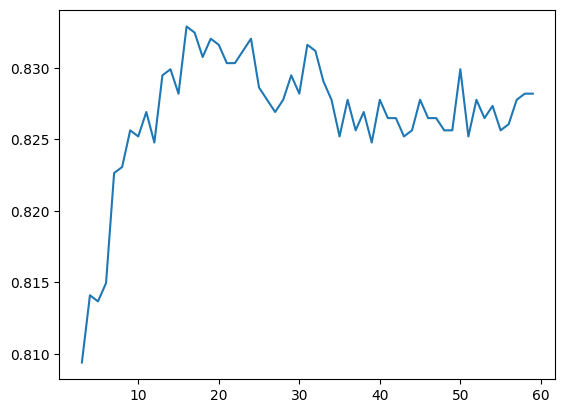

In [916]:
plt.plot(range(3,60),track_precision)

In [ ]:
# df = pd.DataFrame(weighted_selected_feat)

In [ ]:
def calculate_neighbour(train_data, test_data, K):
    
    numpy_distances = np.array(euclidean_distances(train_data,[test_data]).flatten())
    inv_distance = []
        
    indexes_by_shortest_dist = numpy_distances.argsort()   
    
    return indexes_by_shortest_dist

In [ ]:
def find_majority_and_predict(train_data, test_data, train_sentiments, K):
    
    nearest_neighbors_indexes = calculate_neighbour(train_data, test_data, K)
    sentiment_classes = []
    
    for i in nearest_neighbors_indexes:
        sentiment_classes.append(train_sentiments[i])
        
    return max(sentiment_classes, key=sentiment_classes.count)

In [ ]:
predicted_sentiments = []
print(len(weighted_test_feat))
for i in range(0,len(weighted_test_feat)):
    print(i)
    predicted_sentiments.append(find_majority_and_predict(weighted_selected_feat,weighted_test_feat[i], train_sentiments_array, 24))
    

In [ ]:
def find_accuracy(predicted_sentiment, real_sentiment):
    correct_prediction = 0
    for i in range(0,len(predicted_sentiments)):
        if predicted_sentiment[i] == real_sentiment[i]:
            correct_prediction += 1
    return np.divide(correct_prediction, len(predicted_sentiment))

In [ ]:
find_accuracy(predicted_sentiments,test_sentiments_array)

In [943]:
result_test_df = pd.read_csv('1661892619_9579706_test_file.csv', names=['reviews'])
basic_cleaning(result_test_df)
tokenize_data(result_test_df)
result_test_df['stop_words_cleaned'] = result_test_df.words.apply(lambda word_list: remove_stopwords(word_list))
result_test_df['lemma_word'] = result_test_df.stop_words_cleaned.apply(lambda word_list: find_lemma_word(word_list))
result_test_df['cleaned_review'] = result_test_df.lemma_word.apply(lambda review_list: " ".join(review_list))
unlabeled_test_feat_matrix = selected_tf_vectorizer.transform(result_test_df['cleaned_review']).toarray()

In [944]:
unlabeled_test_feat_matrix.shape

(18000, 98)

In [ ]:
# def find_max_chi_val(a,b):
#     max_chi = []
#     x = np.array(a)
#     y = np.array(b)
#     for i in range(0, len(x)):
#         max_chi.append(max(x[i],y[i]))
#     return np.array(max_chi)

In [291]:
# chi_sqare_table['max_chi_value'] = find_max_chi_val(chi_sqare_table['positiev_sentiments'], chi_sqare_table['negatiev_sentiments'])
chi_sqare_table

,positiev_sentiments,negatiev_sentiments,sum
0,100.987511,93.001330,193.988842
1,94.951223,87.442397,182.393620
2,42.049707,38.724379,80.774086
3,40.112482,36.940352,77.052834
4,15.777274,14.529594,30.306868
...,...,...,...
105,52.167794,48.042319,100.210113
106,20.704853,19.067495,39.772348
107,23.487752,21.630320,45.118072
108,20.752573,19.111442,39.864015


In [292]:
def weight_unlabled_data(features, max_chi_val):
    weighted_data = []
    for i in range(0,len(features)):
        weighted_data.append(np.multiply(features[i], max_chi_val))
    return np.array(weighted_data)

In [293]:
unlabled_weighted_data = weight_unlabled_data(unlabeled_test_feat_matrix, chi_sqare_table['sum'])

In [294]:
unlabled_weighted_data.shape

(18000, 110)

In [295]:
predicted_sentiments = []
print(len(unlabled_weighted_data))
for i in range(0,len(unlabled_weighted_data)):
    print(i)
    predicted_sentiments.append(find_majority_and_predict(weighted_selected_feat,unlabled_weighted_data[i], train_sentiments_array, 24))
    

18000
0


NameError: name 'find_majority_and_predict' is not defined

In [945]:
predicted_values = classifer_saved.predict(unlabeled_test_feat_matrix)

In [946]:
predicted_values.shape

(18000,)

In [947]:
import csv
outfile = open('./results.csv','w')
out = csv.writer(outfile)
out.writerows(map(lambda x: [x], predicted_values))
outfile.close()

In [948]:
1/(10**2)

0.01